Add GAMA emission lines to template spectra

In [2]:
import numpy as np 
# -- local -- 
import env
from feasibgs import util as UT
from feasibgs import catalogs as Cat
from feasibgs import forwardmodel as FM

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

read in GAMA-legacy catalog

In [4]:
cata = Cat.GamaLegacy()
gleg = cata.Read()

calculate absolute magnitude with `k-correct` to $z = 0.1$

In [8]:
redshift = gleg['gama-spec']['z_helio']

In [6]:
absmag_ugriz = cata.AbsMag(gleg, kcorr=0.1, H0=70, Om0=0.3)

/Users/chang/projects/feasiBGS/feasibgs/catalogs.py:197: RuntimeWarning: divide by zero encountered in log10
  DM = 5. * np.log10(1e5*D_L)
/Users/chang/projects/feasiBGS/feasibgs/catalogs.py:197: RuntimeWarning: invalid value encountered in log10
  DM = 5. * np.log10(1e5*D_L)


In [7]:
i_rand = np.random.choice(range(absmag_ugriz.shape[1]), size=10)

In [9]:
# compile z, M_r0.1, 0.1(g-r)
gleg_meta = np.vstack([
    redshift[i_rand], 
    absmag_ugriz[2,i_rand], 
    absmag_ugriz[1,i_rand] - absmag_ugriz[2,i_rand]]).T

In [10]:
bgs3 = FM.BGStree()
match, _ = bgs3.Query(gleg_meta)

INFO:io.py:1015:read_basis_templates: Reading /Volumes/chang_eHDD/projects/desi/spectro/templates/basis_templates/v2.3/bgs_templates_v2.1.fits metadata.


In [11]:
bgstemp = FM.BGStemplates(wavemin=1500., wavemax=2e4)

INFO:io.py:1027:read_basis_templates: Reading /Volumes/chang_eHDD/projects/desi/spectro/templates/basis_templates/v2.3/bgs_templates_v2.1.fits


In [12]:
vdisp = np.repeat(100.0, len(i_rand))

In [13]:
flux_temp, wave_temp, meta_temp = bgstemp.Spectra(
    gleg['gama-photo']['modelmag_r'][i_rand], redshift[i_rand], vdisp, seed=1, templateid=match)

Text(0,0.5,'$f(\\lambda) \\,\\,[10^{-17} erg/s/cm^2/A]$')

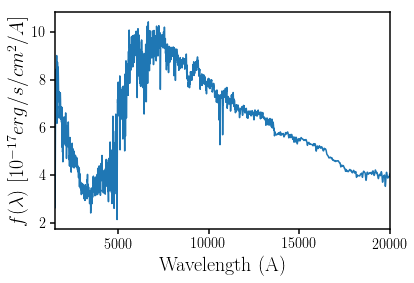

In [18]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(wave_temp, flux_temp[0].T)
sub.set_xlabel('Wavelength (A)', fontsize=20)
sub.set_xlim([1500., 2e4])
sub.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)

In [30]:
print gleg['gama-spec']['ha'][:5]
print gleg['gama-spec']['haew'][:5]

[3.97730e+02 3.20764e+01 1.00244e+00 1.91069e+03 8.41146e+00]
[1.58095e+02 4.87707e+00 7.04552e-02 4.46260e+01 9.58124e-01]


In [31]:
print gleg['gama-spec']['ha'][:5]/gleg['gama-spec']['haew'][:5]

[ 2.515766  6.576982 14.228048 42.815624  8.779094]


In [ ]:
gauss

In [23]:
L_ha = 6563. # rest frame H-alpha

In [ ]:
gleg['gama-spec']['ha'][0]/np.sqrt(2.*np.pi*gleg['gama-spec']['hasig']**2) * np.exp(-(wave_temp - L_ha*redshift[0]))

(2.0, 12.0)

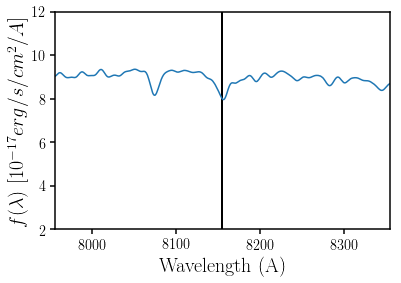

In [37]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(wave_temp, flux_temp[0].T)
#sub.plot(wave_temp, gleg['gama-spec']['ha'][0]/np.sqrt(2.*np.pi*gleg['gama-spec']['hasig']**2) * np.exp(-(wave_temp)))
sub.vlines(L_ha * (1.0+redshift[i_rand][0]), 0., 20., color='k', linewidth=2)
sub.set_xlabel('Wavelength (A)', fontsize=20)
sub.set_xlim([L_ha*(1.0+redshift[i_rand][0])-200., L_ha*(1.0+redshift[i_rand][0])+200.])
sub.set_ylabel(r'$f(\lambda) \,\,[10^{-17} erg/s/cm^2/A]$', fontsize=20)
sub.set_ylim([2., 12.])

In [38]:
print redshift[i_rand]

[0.2426  0.20734 0.29247 0.12436 0.12775 0.28254 0.13523 0.1838  0.20032
 0.29827]
